In [0]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [2]:
torch.manual_seed(1)

In [0]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])


In [4]:
train_data=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)

test_data=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,download=True,transform=transform)

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
trainloader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
testlaoder=DataLoader(dataset=test_data,batch_size=32,shuffle=False)

In [0]:
#build model using nn.sequential
class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.a1=nn.Sequential(nn.Linear(784,256),nn.ReLU(),nn.Dropout(p=0.5),nn.Linear(256,256),nn.ReLU(),nn.Dropout(p=0.5),nn.Linear(256,10),nn.Softmax(dim=1))

  def forward(self,x):
    return self.a1(x)

In [7]:
#build model using nn
class net1(nn.Module):
  def __init__(self):
    super(net1,self).__init__()
    self.l1=nn.Linear(784,256)
    self.l2=nn.Linear(256,256)
    self.l3=nn.Linear(256,10)

  def forward(self,x):
    x=F.relu(self.l1(x))
    x=F.dropout(x,p=0.5)
    x=F.relu(self.l2(x))
    x=F.dropout(x,p=0.5)
    x=F.softmax(self.l3(x),dim=1)
    return x

In [0]:
#model with CNN
class net2(nn.Module):
  def __init__(self):
    super(net2,self).__init__()
    self.a1=nn.Sequential(nn.Conv2d(1,20,kernel_size=5),nn.ReLU(),nn.MaxPool2d(2,2),nn.Conv2d(20,50,kernel_size=5),nn.MaxPool2d(2,2),nn.Flatten(),nn.Linear(4*4*50,500),nn.ReLU(),nn.Linear(500,10),nn.Softmax(dim=1))

  def forward(self,x):
    return self.a1(x)

In [0]:
model=net()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [0]:
model1=net1()
optimizer1=torch.optim.SGD(model1.parameters(),lr=0.01)

In [0]:
model2=net2()
criterion=nn.CrossEntropyLoss()
optimizer2=torch.optim.SGD(model2.parameters(),lr=0.01)

In [12]:
#result for model with nn
epochs=5
loss1=[]
for epoch in range(epochs):
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1) #flattening image
    yhat=model1(images)
    optimizer1.zero_grad()
    loss=criterion(yhat,labels)
    loss.backward()
    optimizer1.step()
    loss1=loss.sum().item()
  print('loss is',loss1,'for epoch',epoch)

loss is 2.0984549522399902 for epoch 0
loss is 1.8605493307113647 for epoch 1
loss is 1.835319995880127 for epoch 2
loss is 1.6424235105514526 for epoch 3
loss is 1.6980377435684204 for epoch 4


In [13]:
#result for model with nn.sequential
epochs=5
loss1=[]
for epoch in range(epochs):
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1) #flattening image
    yhat=model(images)
    optimizer.zero_grad()
    loss=criterion(yhat,labels)
    loss.backward()
    optimizer.step()
    loss1=loss.sum().item()
  print('loss is',loss1,'for epoch',epoch)

loss is 2.1221933364868164 for epoch 0
loss is 1.6131068468093872 for epoch 1
loss is 1.7331360578536987 for epoch 2
loss is 1.652279257774353 for epoch 3
loss is 1.7046713829040527 for epoch 4


In [14]:
#result for model with CNN
epochs=5
loss1=[]
for epoch in range(epochs):
  for images,labels in trainloader:
    #images=images.view(images.shape[0],-1) #flattening image
    yhat=model2(images)
    optimizer2.zero_grad()
    loss=criterion(yhat,labels)
    loss.backward()
    optimizer2.step()
    loss1=loss.sum().item()
  print('loss is',loss1,'for epoch',epoch)

loss is 1.8199423551559448 for epoch 0
loss is 1.5555717945098877 for epoch 1
loss is 1.495146632194519 for epoch 2
loss is 1.501947045326233 for epoch 3
loss is 1.508806586265564 for epoch 4


true label is 1 predicted label is 2
true label is 2 predicted label is 7
true label is 9 predicted label is 5
true label is 1 predicted label is 2
true label is 9 predicted label is 8


/usr/local/lib/python3.6/dist-packages/torch/tensor.py:365: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


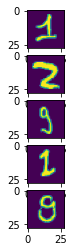

In [19]:
#first five mismatch images from cnn model
count=0
fig=plt.figure()
for images,labels in torch.utils.data.DataLoader(dataset=train_data,batch_size=1):
  yhat=model2(images)
  _,label=torch.max(yhat,1)
  if label!=labels:
    print('true label is',labels.item(),'predicted label is',label.item())
    img=images.view(images.shape[0],-1)
    fig.add_subplot(5,1,count+1)
    plt.imshow(img.resize(1,28,28).numpy().squeeze())
    count +=1
    if count>=5:
      break
plt.show()